In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
G = nx.read_graphml("citespace/1005.graphml")

In [6]:
print("Number of nodes:", G.number_of_nodes(), "Number of edges:", G.number_of_edges())


Number of nodes: 1005 Number of edges: 3398


In [9]:
for n, data in G.nodes(data=True):
    print(n, data)  # Shows node id and all attributes

0 {'name': 'Decoursey Patricia J', 'label': 'Decoursey Patricia J, 2004, P27, V0, P0', 'author': 'Decoursey Patricia J', 'year': '2004', 'title': '...', 'so': 'P27', 'vol': '0', 'pg': '0', 'ut': '', 'freq': 1}
1 {'name': 'Wolf H', 'label': 'Wolf H, 2008, BEHAV ECOL SOCIOBIOL, V62, P415, DOI 10.1007/s00265-007-0469-0', 'author': 'Wolf H', 'year': '2008', 'title': '...', 'so': 'BEHAV ECOL SOCIOBIOL', 'vol': '62', 'pg': '415', 'ut': '', 'freq': 2}
2 {'name': 'Dennehy A', 'label': 'Dennehy A, 1997, NOT BE IGNORED YOUNG, V0, P0', 'author': 'Dennehy A', 'year': '1997', 'title': '...', 'so': 'NOT BE IGNORED YOUNG', 'vol': '0', 'pg': '0', 'ut': '', 'freq': 1}
3 {'name': 'Morton LW', 'label': 'Morton LW, 2005, RURAL SOCIOL, V70, P94, DOI 10.1526/0036011053294628', 'author': 'Morton LW', 'year': '2005', 'title': '...', 'so': 'RURAL SOCIOL', 'vol': '70', 'pg': '94', 'ut': '', 'freq': 5}
4 {'name': 'Treuhaft S', 'label': 'Treuhaft S, 2010, GROCERY GAP WHO HAS, V0, P0', 'author': 'Treuhaft S', 'yea

In [34]:
G.edges

EdgeView([('0', '150'), ('0', '394'), ('0', '474'), ('0', '688'), ('1', '99'), ('2', '343'), ('2', '391'), ('2', '482'), ('2', '910'), ('3', '280'), ('3', '306'), ('3', '516'), ('3', '614'), ('4', '116'), ('4', '197'), ('4', '256'), ('4', '273'), ('4', '328'), ('4', '371'), ('4', '389'), ('4', '417'), ('4', '628'), ('4', '658'), ('4', '702'), ('4', '715'), ('4', '757'), ('5', '260'), ('5', '349'), ('5', '377'), ('5', '388'), ('5', '621'), ('6', '140'), ('6', '170'), ('6', '292'), ('6', '350'), ('6', '438'), ('6', '451'), ('6', '453'), ('6', '496'), ('6', '526'), ('6', '600'), ('6', '690'), ('6', '751'), ('6', '919'), ('6', '926'), ('6', '986'), ('7', '141'), ('8', '211'), ('8', '424'), ('8', '433'), ('8', '436'), ('8', '505'), ('8', '768'), ('8', '815'), ('8', '952'), ('9', '15'), ('9', '20'), ('9', '21'), ('9', '32'), ('9', '35'), ('9', '75'), ('9', '121'), ('9', '153'), ('9', '155'), ('9', '213'), ('9', '393'), ('9', '411'), ('9', '463'), ('9', '478'), ('9', '539'), ('9', '552'), ('9

In [10]:
for u, v, edata in G.edges(data=True):
    print(u, v, edata)  # Shows the edge and attributes

0 150 {'weight': 1.0, 'slice': 13, 'year': '2007'}
0 394 {'weight': 1.0, 'slice': 13, 'year': '2007'}
0 474 {'weight': 1.0, 'slice': 13, 'year': '2007'}
0 688 {'weight': 1.0, 'slice': 13, 'year': '2007'}
1 99 {'weight': 1.0, 'slice': 18, 'year': '2012'}
2 343 {'weight': 1.0, 'slice': 6, 'year': '2000'}
2 391 {'weight': 1.0, 'slice': 6, 'year': '2000'}
2 482 {'weight': 1.0, 'slice': 6, 'year': '2000'}
2 910 {'weight': 1.0, 'slice': 6, 'year': '2000'}
3 280 {'weight': 0.6666666865348816, 'slice': 16, 'year': '2010'}
3 306 {'weight': 0.8164966106414795, 'slice': 16, 'year': '2010'}
3 516 {'weight': 0.6666666865348816, 'slice': 16, 'year': '2010'}
3 614 {'weight': 0.0008164966711774468, 'slice': 16, 'year': '2010'}
4 116 {'weight': 0.5773502588272095, 'slice': 21, 'year': '2015'}
4 197 {'weight': 0.6666666865348816, 'slice': 21, 'year': '2015'}
4 256 {'weight': 0.40824830532073975, 'slice': 20, 'year': '2014'}
4 273 {'weight': 0.5163977742195129, 'slice': 21, 'year': '2015'}
4 328 {'weight

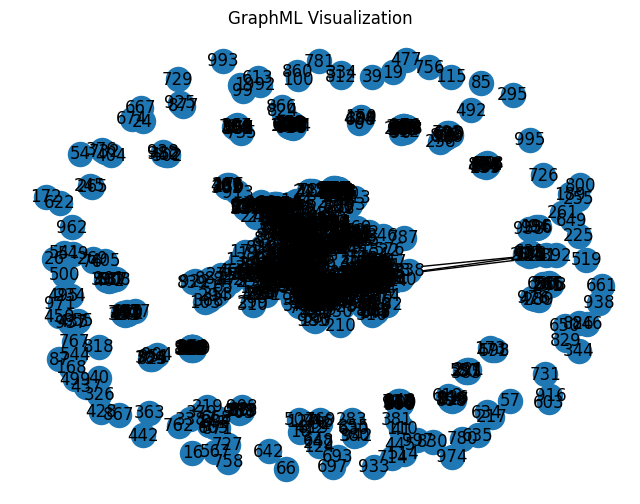

In [7]:
plt.figure(figsize=(8, 6))  # You can adjust the figure size

# A layout for the graph (spring layout is common, but there are others)
pos = nx.spring_layout(G)  

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.title("GraphML Visualization")
plt.axis("off")  # Hide the axes for clarity
plt.show()

In [35]:
pos = {}
for node, data in G.nodes(data=True):
    try:
        # Convert the 'year' attribute to int
        x_coord = int(data["year"])
    except (ValueError, TypeError):
        x_coord = 0  # fallback if missing or invalid
    
    # Use a small random or jitter for the y-axis, so nodes do not all stack
    y_coord = random.uniform(-0.5, 0.5)  
    pos[node] = (x_coord, y_coord)

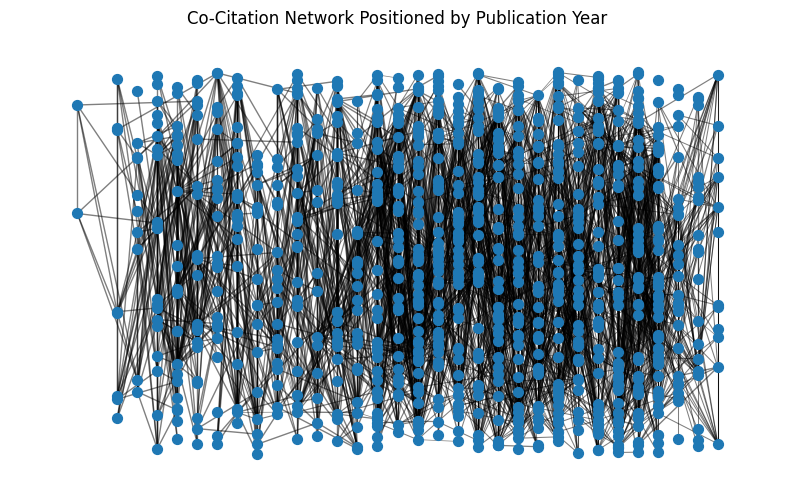

In [37]:
plt.figure(figsize=(10, 6))

# Draw edges with thickness proportional to 'weight'
# (If many edges, might be slow. For clarity, we can scale or set alpha.)
edge_widths = []
for u, v, edata in G.edges(data=True):
    # Example: scale the line width a bit
    w = edata.get("weight", 1.0)
    edge_widths.append(0.5 + w * 0.5)  # or any scaling you prefer

nx.draw_networkx_edges(G, pos=pos, width=edge_widths, alpha=0.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos=pos, node_size=50)

plt.title("Co-Citation Network Positioned by Publication Year")
plt.axis("off")
plt.show()

In [38]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
# communities is a list of sets of node IDs

# Create a dict mapping node -> community_index
node_community_map = {}
for i, cset in enumerate(communities):
    for node in cset:
        node_community_map[node] = i

In [50]:
all_communities = community.greedy_modularity_communities(G)
print(f"Total communities found: {len(all_communities)}")

# Sort communities by size descending
sorted_communities = sorted(all_communities, key=lambda c: len(c), reverse=True)

# Decide how many communities you want to keep:
#   Option A: Keep the top K biggest communities
K = 10
big_communities = sorted_communities[:K]

Total communities found: 127


In [51]:
node_community_map = {}
for i, cset in enumerate(big_communities):
    for node in cset:
        node_community_map[node] = i

num_communities = len(big_communities)

In [53]:
big_nodes = set().union(*big_communities)

G_big = G.subgraph(big_nodes).copy()

betw = nx.betweenness_centrality(G_big)  # returns dict: node -> centrality


In [54]:
pos2 = {}
for node, data in G_big.nodes(data=True):
    # Convert node's 'year' to int if possible
    try:
        year_val = int(data.get("year", 0))
    except ValueError:
        year_val = 0
    
    # Find the node's community index; default -1 if not found
    comm_idx = node_community_map.get(node, -1)
    
    # Add a small random offset so nodes don’t overlap exactly
    offset = random.uniform(-0.3, 0.3)
    pos2[node] = (year_val, comm_idx + offset)


In [58]:
nodelist = list(G_big.nodes())

community_colors = []
node_sizes = []

for n in nodelist:
    # figure out the community index for node n
    c_idx = node_community_map[n]
    community_colors.append(c_idx)

    # compute betweenness-based size
    # (betw might have been computed on G_big or original G, just be consistent)
    score = betw[n]
    node_sizes.append(50 + 900 * score)

In [46]:
max_betw = max(betw.values()) if betw else 1.0  # avoid zero division if empty

In [55]:
for n in G_big.nodes():
    c_index = node_community_map.get(n, -1)
    community_colors.append(c_index)
    
    # Scale betweenness into, say, [100, 1000] for node size
    node_sizes.append(100 + 900 * (betw[n] / max_betw))

In [69]:
node_sizes = []
for n in nodelist:
    # Get freq value from node attributes; default to 1 if missing
    freq_val = G_big.nodes[n].get("freq", 1)
    # Scale freq to get a visible size, e.g. freq * 50
    node_sizes.append(freq_val * 50)

In [70]:
labels_for_nodes = {}
for n in nodelist:
    freq_val = G_big.nodes[n].get("freq", 1)
    if freq_val >= 10:
        # Label this node with its NodeID
        labels_for_nodes[n] = str(n)

In [91]:
all_years = []
for n, data in G_big.nodes(data=True):
    try:
        yr = int(data.get("year", 0))
        all_years.append(yr)
    except ValueError:
        # Some nodes may have invalid year string
        all_years.append(0)

if not all_years:
    # fallback if no years found
    all_years = [0, 1]

min_year = min(all_years)
max_year = max(all_years)

C:\Users\jour\AppData\Local\Temp\ipykernel_45500\2001336574.py:3: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_big, pos=pos2, alpha=0.3, width=1, connectionstyle='arc3,rad=0.5')


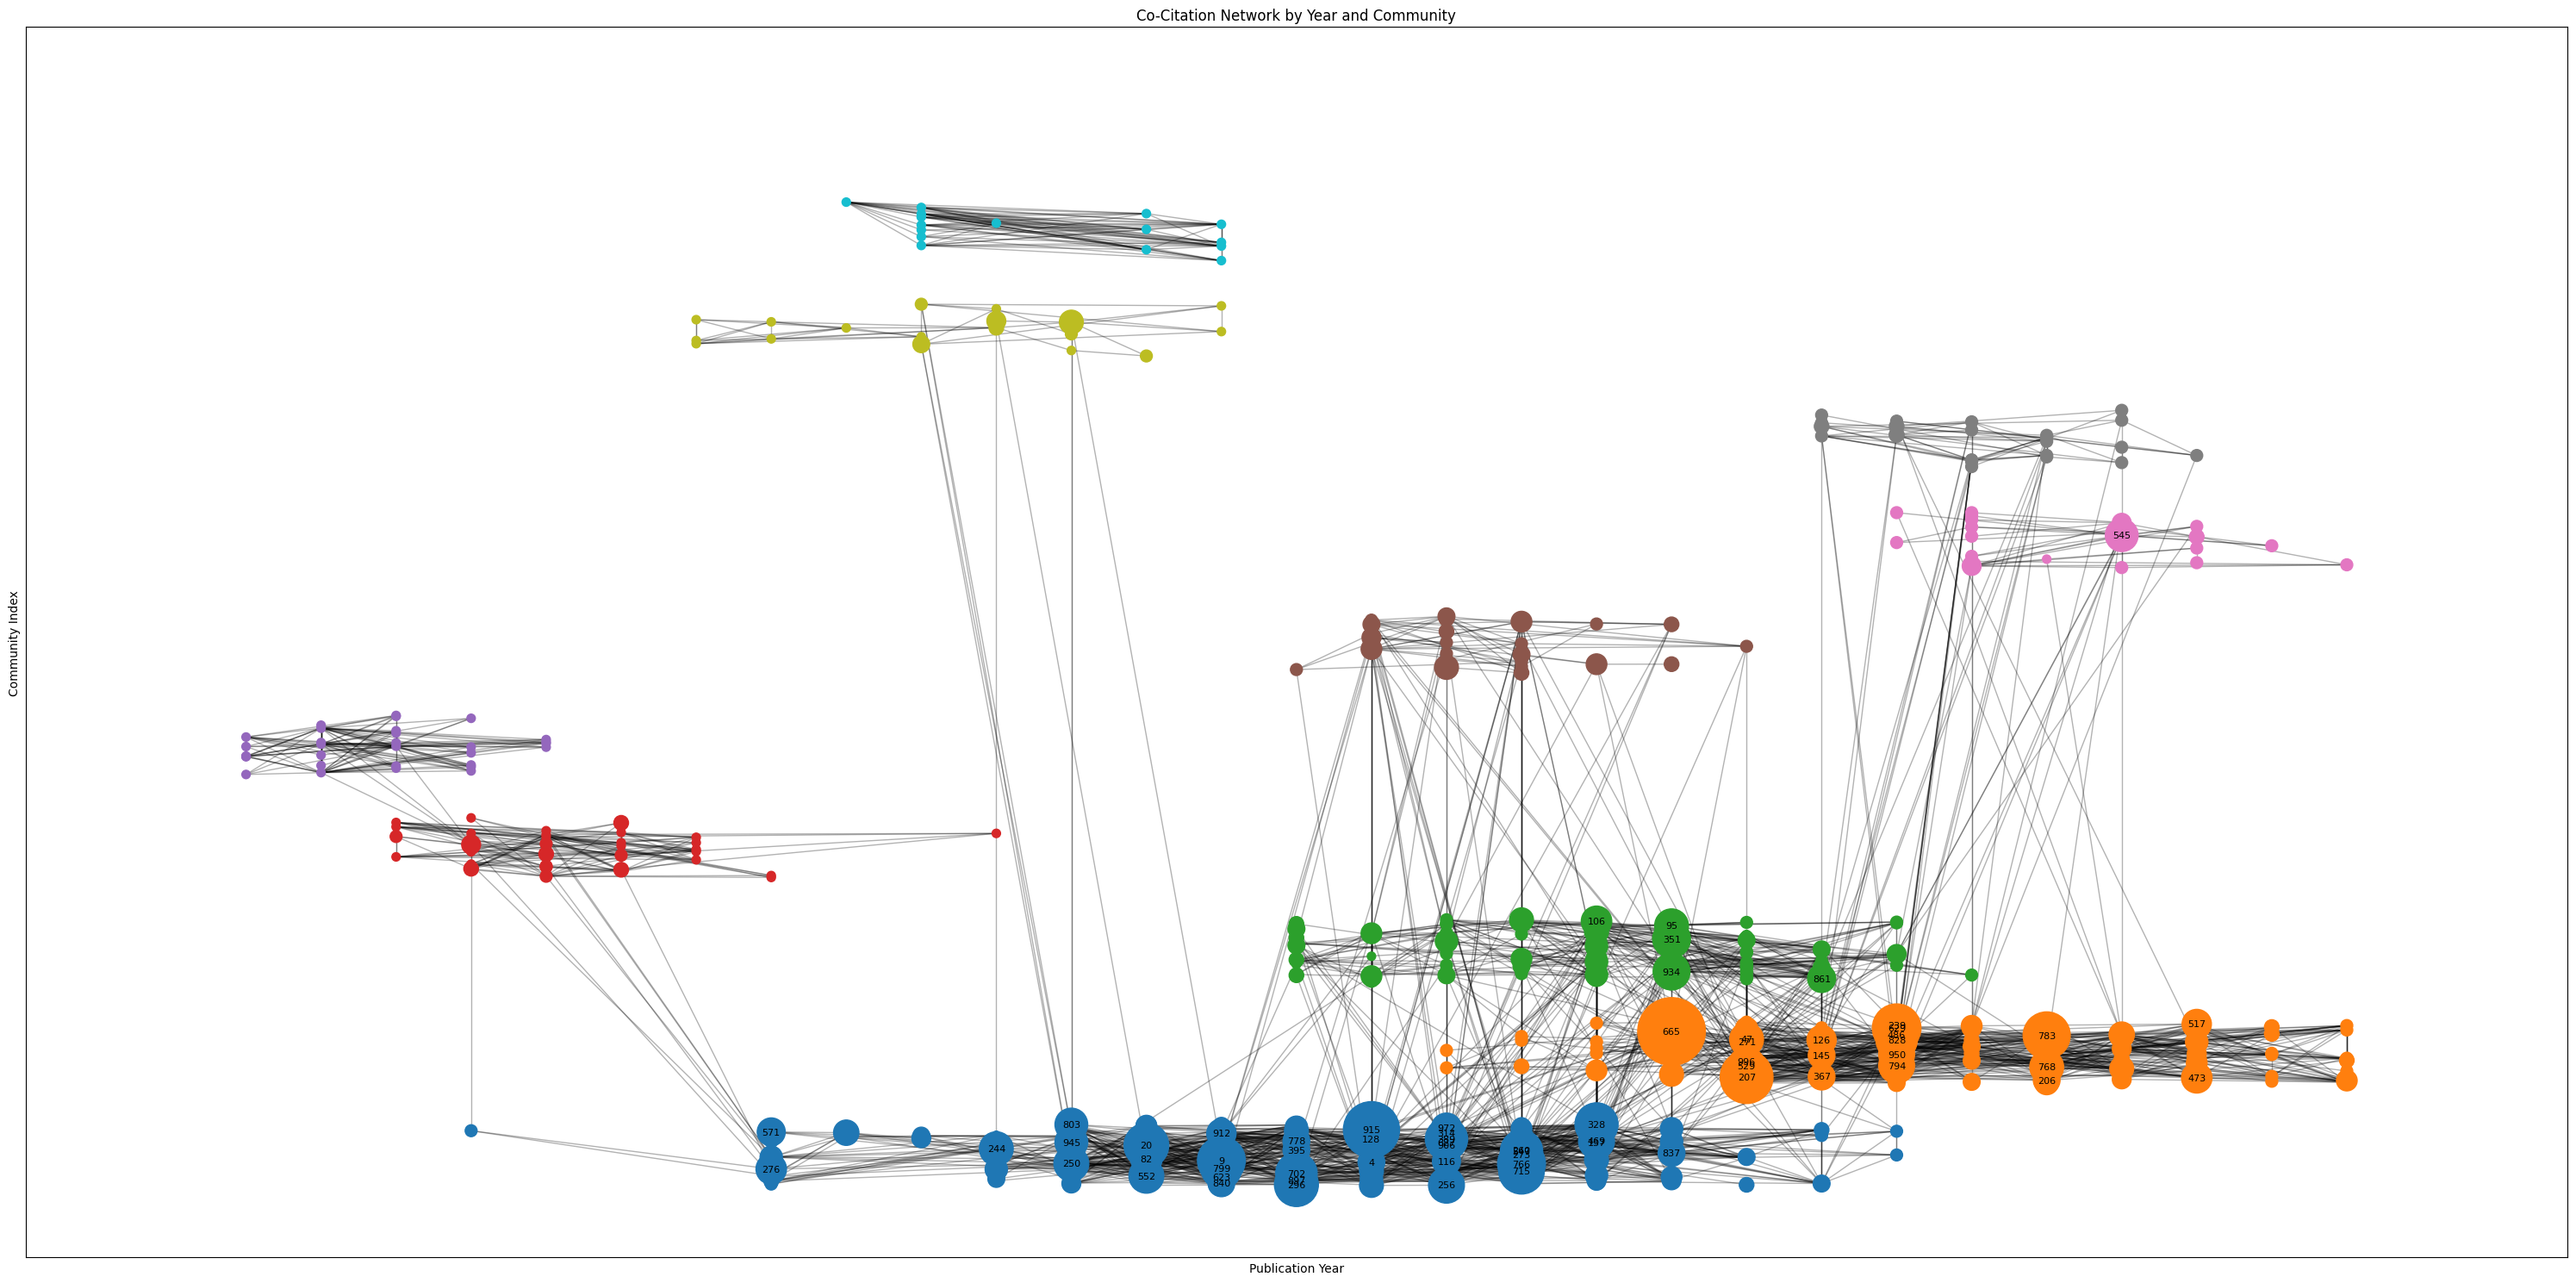

In [97]:
plt.figure(figsize=(30, 15))

nx.draw_networkx_edges(G_big, pos=pos2, alpha=0.3, width=1, connectionstyle='arc3,rad=0.5')

nx.draw_networkx_nodes(
    G_big, pos=pos2,
    nodelist=nodelist,
    node_color=community_colors,
    node_size=node_sizes,
    cmap=plt.cm.tab10
)

nx.draw_networkx_labels(
    G_big,
    pos=pos2,
    labels=labels_for_nodes,
    font_size=8,
    font_color="black"  # or any color you prefer
)

plt.title("Co-Citation Network by Year and Community")
plt.xlabel("Publication Year")
plt.ylabel("Clutering Communities")
plt.xticks(range(min_year, max_year + 1, 2))  
plt.ylim(-1, num_communities + 1)
plt.tight_layout()
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

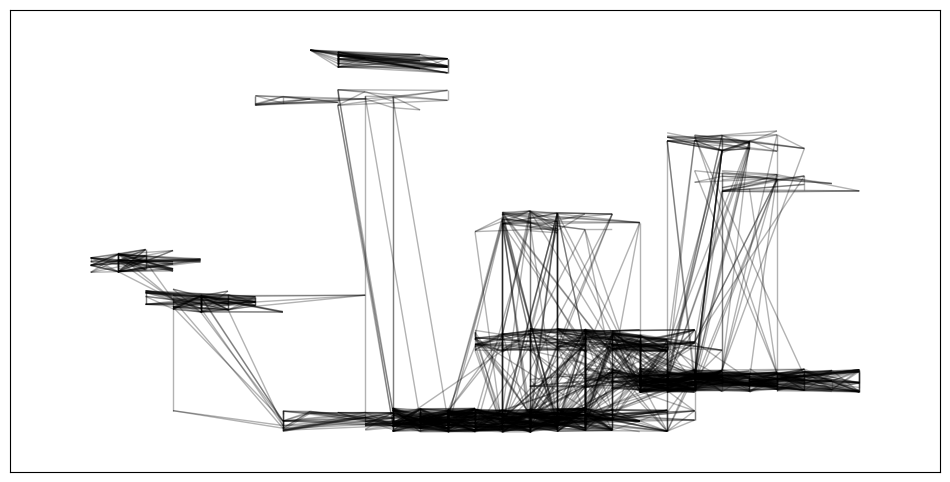

In [ ]:
# plt.figure(figsize=(12, 6))

# # Draw edges
# #   (Edges may connect nodes in different communities or across years)
# nx.draw_networkx_edges(
#     G_big, pos=pos2,
#     alpha=0.3,
#     width=1
# )

# # Draw nodes with colors = community index, sizes = betweenness
# nx.draw_networkx_nodes(
#     G_big, pos=pos2,
#     node_color=community_colors,
#     node_size=node_sizes,
#     cmap=plt.cm.tab10  # color map for up to 10 communities; adapt as needed
# )

# # Build a dictionary of labels ONLY for top nodes
# top_node_ids = [node_id for node_id, bc in top_nodes]
# labels_for_top_nodes = {n: str(n) for n in top_node_ids}  

# # Label only these nodes (NodeID as text)
# nx.draw_networkx_labels(G, pos=pos2, labels=labels_for_top_nodes, font_size=7)

# plt.title("Co-Citation Network by Year (X) and Community (Y)")
# plt.xlabel("Publication Year")
# plt.ylabel("Community Index")
# plt.ylim(-1, num_communities + 1)  # extra space at top/bottom
# plt.tight_layout()
# plt.show()

In [41]:
num_top = 50
sorted_nodes = sorted(betw.items(), key=lambda x: x[1], reverse=True)
top_nodes = sorted_nodes[:num_top]

print(f"Top {num_top} important nodes by Betweenness Centrality:")
for rank, (node_id, bc) in enumerate(top_nodes, start=1):
    label_str = G.nodes[node_id].get("label", "NoLabel")
    print(f"{rank:2d}. NodeID={node_id}, Betw={bc:.4f}, label={label_str}")

Top 50 important nodes by Betweenness Centrality:
 1. NodeID=915, Betw=0.0987, label=Walker RE, 2010, HEALTH PLACE, V16, P876, DOI 10.1016/j.healthplace.2010.04.013
 2. NodeID=665, Betw=0.0867, label=Cummins S, 2014, HEALTH AFFAIR, V33, P283, DOI 10.1377/hlthaff.2013.0512
 3. NodeID=250, Betw=0.0797, label=Shaw HJ, 2006, GEOGR ANN B, V88B, P231, DOI 10.1111/j.0435-3684.2006.00217.x
 4. NodeID=582, Betw=0.0482, label=Department of Health, 1998, INDEPENDENT INQUIRY, V0, P0
 5. NodeID=533, Betw=0.0444, label=Clarke G, 2002, URBAN STUD, V39, P2041, DOI 10.1080/0042098022000011353
 6. NodeID=455, Betw=0.0410, label=MacNell L, 2017, J HUNGER ENVIRON NUT, V12, P375, DOI 10.1080/19320248.2017.1284025
 7. NodeID=276, Betw=0.0375, label=Wrigley N, 2002, URBAN STUD, V39, P2029, DOI 10.1080/0042098022000011344
 8. NodeID=233, Betw=0.0364, label=Burgoine T, 2013, INT J BEHAV NUTR PHY, V10, P0, DOI 10.1186/1479-5868-10-85
 9. NodeID=952, Betw=0.0348, label=Ploeg MV, 2015, APPL ECON PERSPECT P, V37, 

In [61]:
comm_dataframes = {}

for i, cset in enumerate(communities):
    rows = []
    for node_id in cset:
        # Retrieve node attributes
        node_data = G.nodes[node_id]
        
        # For example, you might want columns like:
        # NodeID, name, label, year, freq, etc.
        rows.append({
            "NodeID": node_id,
            "name": node_data.get("name", ""),
            "label": node_data.get("label", ""),
            "year": node_data.get("year", ""),
            "freq": node_data.get("freq", None)
        })
    
    # Convert to a DataFrame
    df = pd.DataFrame(rows)
    
    # Store in dictionary
    comm_dataframes[i] = df

In [68]:
comm_dataframes[0].sort_values('freq', ascending = False).head(15)

NodeID              name  \
182    915         Walker RE   
51       9          Larsen K   
25     766             An RP   
195    715             Lee H   
170     20       Apparicio P   
145    296         Larson NI   
143    328         LeDoux TF   
203    547           Jiao JF   
237    273          Caspi CE   
140    389  Boone-Heinonen J   
74     702         Beaulac J   
26     799            Raja S   
29     256         Hubley TA   
12     469        Widener MJ   
61     128         McEntee J   

                                                 label  year  freq  
182  Walker RE, 2010, HEALTH PLACE, V16, P876, DOI ...  2010    44  
51   Larsen K, 2008, INT J HEALTH GEOGR, V7, P0, DO...  2008    32  
25   An RP, 2012, AM J PREV MED, V42, P129, DOI 10....  2012    32  
195  Lee H, 2012, SOC SCI MED, V74, P1193, DOI 10.1...  2012    29  
170  Apparicio P, 2007, INT J HEALTH GEOGR, V6, P0,...  2007    28  
145  Larson NI, 2009, AM J PREV MED, V36, P74, DOI ...  2009    27  
143  LeDoux TF, 2013, HEALTH PLACE, V19, P1, DOI 10...  2013    26  
203  Jiao JF, 2012, AM J PUBLIC HEALTH, V102, PE32,...  2012    25  
237  Caspi CE, 2012, HEALTH PLACE, V18, P1172, DOI ...  2012    25  
140  Boone-Heinonen J, 2011, ARCH INTERN MED, V171,...  2011    25  
74           Beaulac J, 2009, PREV CHRONIC DIS, V6, P0  2009    24  
26   Raja S, 2008, J PLAN EDUC RES, V27, P469, DOI ...  2008    23  
29   Hubley TA, 2011, APPL GEOGR, V31, P1224, DOI 1...  2011    18  
12   Widener MJ, 2013, HEALTH PLACE, V21, P1, DOI 1...  2013    18  
61   McEntee J, 2010, APPL GEOGR, V30, P165, DOI 10...  2010    17

### Time-series Co-citation Network Analysis

In [11]:
# Collect all years from edges
edge_years = []
for u, v, edata in G.edges(data=True):
    if "year" in edata and edata["year"]:
        edge_years.append(edata["year"])

unique_years = sorted(set(edge_years))

print("All edge years in the graph:", unique_years)

All edge years in the graph: ['1996', '1998', '1999', '2000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [16]:
subgraphs_by_year = {}
for y in unique_years:
    edges_this_year = [
        (u, v) for (u, v, edata) in G.edges(data=True)
        if edata.get("year") == y
    ]
    subG = G.edge_subgraph(edges_this_year).copy()
    subgraphs_by_year[y] = subG

In [17]:
from networkx.algorithms import community

for y in unique_years:
    subG = subgraphs_by_year[y]
    if subG.number_of_nodes() == 0:
        print(f"Year {y}: no edges or nodes.")
        continue
    
    # Find communities using Greedy Modularity
    communities = community.greedy_modularity_communities(subG)
    
    print(f"Year {y} - Number of communities detected: {len(communities)}")
    
    # communities is a list (or list-like) of sets of nodes
    for i, comm in enumerate(communities):
        print(f"  Community {i}: {len(comm)} nodes")
        # If you want, you can list them all:
        # print(comm)

Year 1996 - Number of communities detected: 1
  Community 0: 6 nodes
Year 1998 - Number of communities detected: 3
  Community 0: 15 nodes
  Community 1: 7 nodes
  Community 2: 3 nodes
Year 1999 - Number of communities detected: 2
  Community 0: 9 nodes
  Community 1: 5 nodes
Year 2000 - Number of communities detected: 2
  Community 0: 23 nodes
  Community 1: 9 nodes
Year 2001 - Number of communities detected: 2
  Community 0: 5 nodes
  Community 1: 5 nodes
Year 2002 - Number of communities detected: 7
  Community 0: 10 nodes
  Community 1: 7 nodes
  Community 2: 7 nodes
  Community 3: 6 nodes
  Community 4: 3 nodes
  Community 5: 2 nodes
  Community 6: 2 nodes
Year 2003 - Number of communities detected: 4
  Community 0: 15 nodes
  Community 1: 6 nodes
  Community 2: 3 nodes
  Community 3: 2 nodes
Year 2005 - Number of communities detected: 3
  Community 0: 9 nodes
  Community 1: 9 nodes
  Community 2: 6 nodes
Year 2006 - Number of communities detected: 6
  Community 0: 10 nodes
  Comm

In [18]:
from networkx.algorithms.community.quality import modularity

partition = list(communities)  # a list of sets
mod = modularity(subG, partition)
print(f"Modularity = {mod:.4f}")

Modularity = 0.4652


In [19]:
# Identifying Important Literature in Each Community
degree_cent = nx.degree_centrality(subG)
betweenness_cent = nx.betweenness_centrality(subG)
pagerank = nx.pagerank(subG)

# Sort nodes by their degree centrality (descending)
sorted_by_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)
print("Top 5 by degree centrality in subG:")
for node, val in sorted_by_degree[:5]:
    print(f"Node {node} - Degree centrality: {val:.4f}")

Top 5 by degree centrality in subG:
Node 611 - Degree centrality: 0.2540
Node 292 - Degree centrality: 0.2381
Node 453 - Degree centrality: 0.2381
Node 438 - Degree centrality: 0.2381
Node 140 - Degree centrality: 0.2381


In [20]:
for i, comm in enumerate(communities):
    comm_subG = subG.subgraph(comm).copy()
    # Compute page rank inside the community
    pr = nx.pagerank(comm_subG)

    # Sort by pagerank
    top_nodes = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"  Top 5 PageRank nodes in Community {i}:")
    for node, score in top_nodes:
        print(f"    {node}: {score:.4f}")

  Top 5 PageRank nodes in Community 0:
    438: 0.0792
    140: 0.0743
    292: 0.0710
    926: 0.0703
    560: 0.0688
  Top 5 PageRank nodes in Community 1:
    701: 0.1184
    257: 0.1184
    548: 0.1184
    930: 0.1182
    905: 0.0873
  Top 5 PageRank nodes in Community 2:
    473: 0.1882
    60: 0.1437
    555: 0.1423
    895: 0.1312
    591: 0.1225
  Top 5 PageRank nodes in Community 3:
    784: 0.3164
    919: 0.3049
    274: 0.1951
    751: 0.1836
  Top 5 PageRank nodes in Community 4:
    31: 0.3047
    806: 0.2857
    222: 0.2857
    835: 0.1238
  Top 5 PageRank nodes in Community 5:
    405: 0.4865
    269: 0.2568
    76: 0.2568
  Top 5 PageRank nodes in Community 6:
    381: 0.3333
    110: 0.3333
    41: 0.3333
  Top 5 PageRank nodes in Community 7:
    127: 0.4865
    504: 0.2568
    18: 0.2568
  Top 5 PageRank nodes in Community 8:
    406: 0.5000
    73: 0.5000
  Top 5 PageRank nodes in Community 9:
    412: 0.5000
    819: 0.5000
  Top 5 PageRank nodes in Community 10:


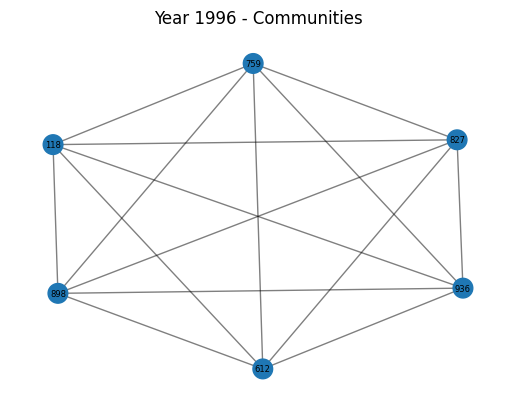

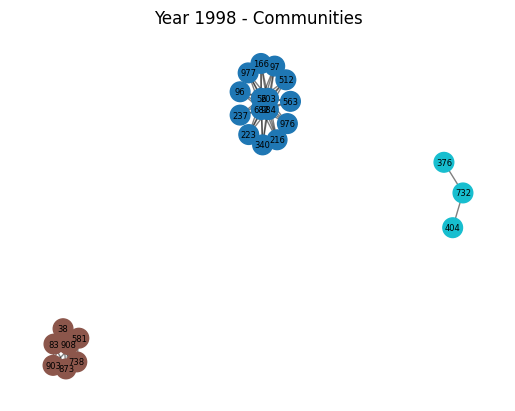

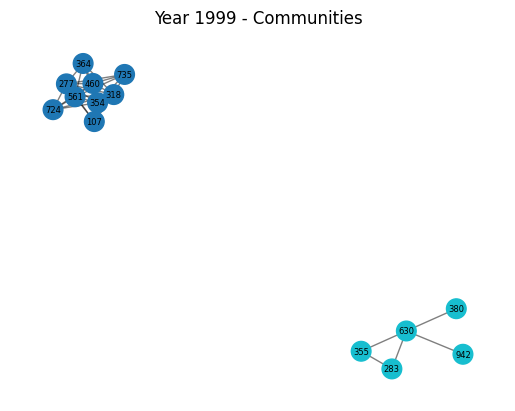

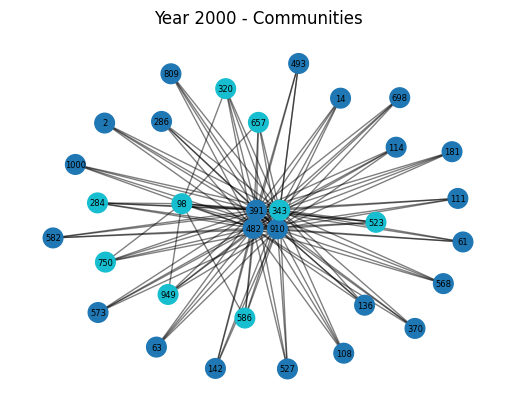

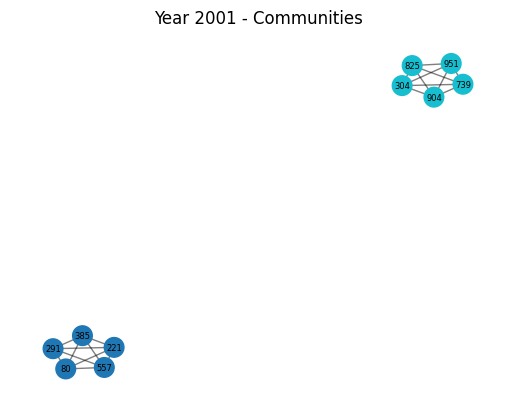

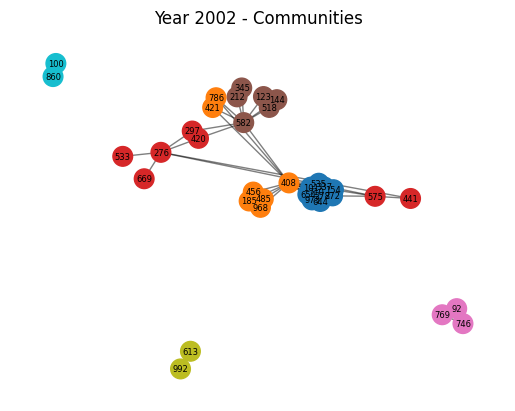

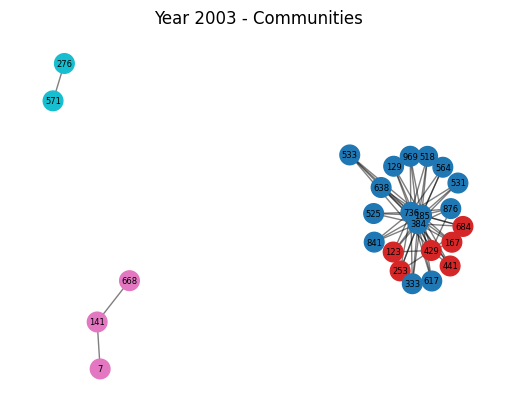

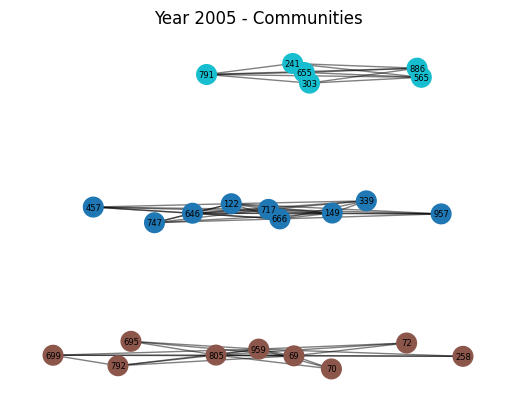

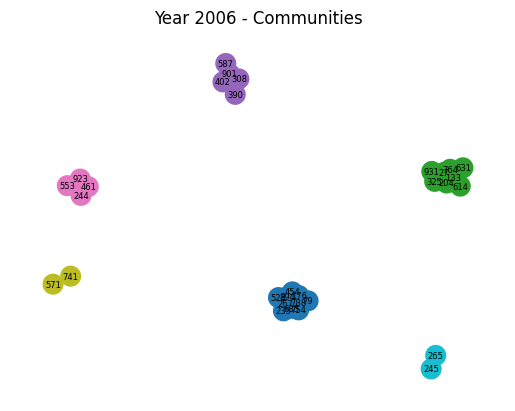

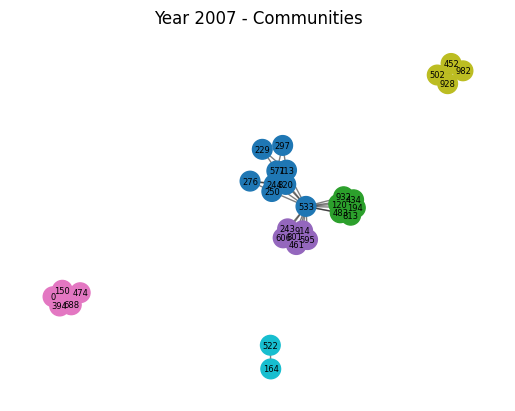

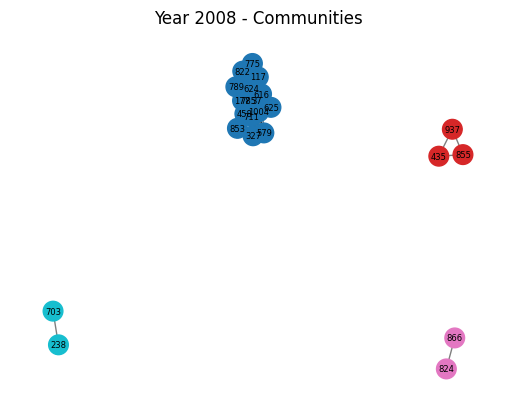

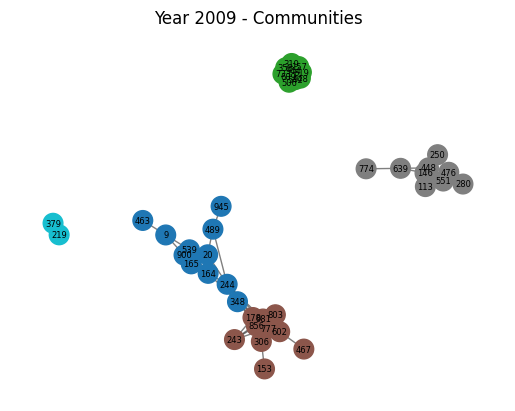

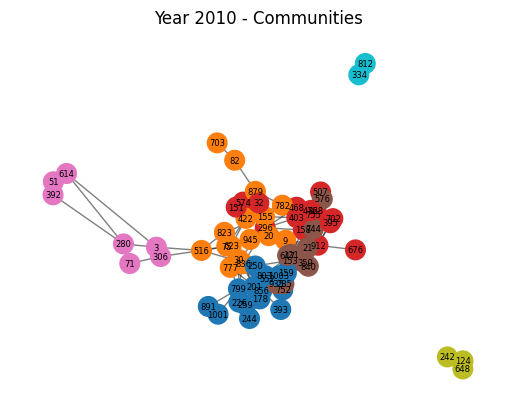

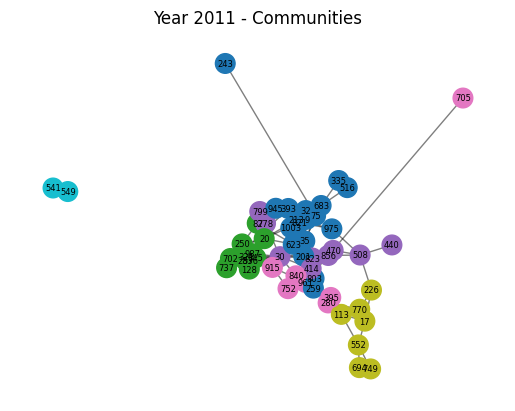

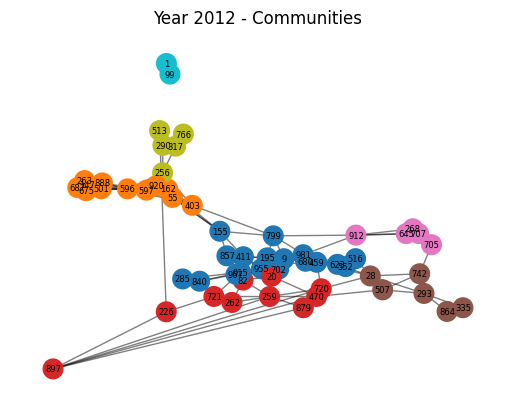

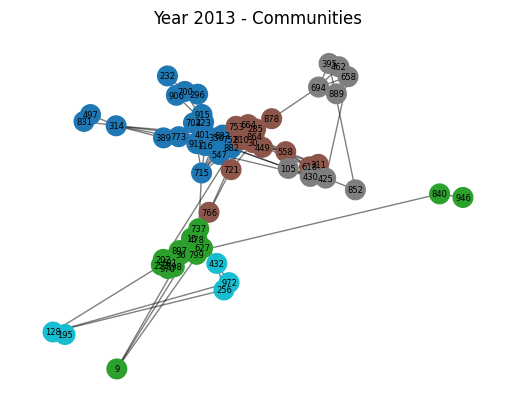

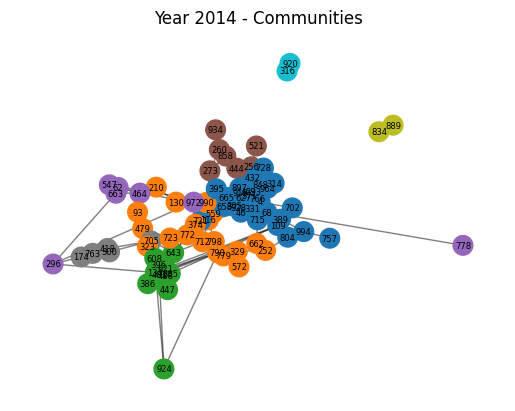

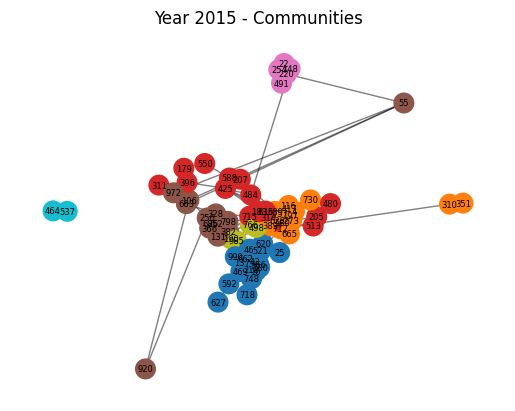

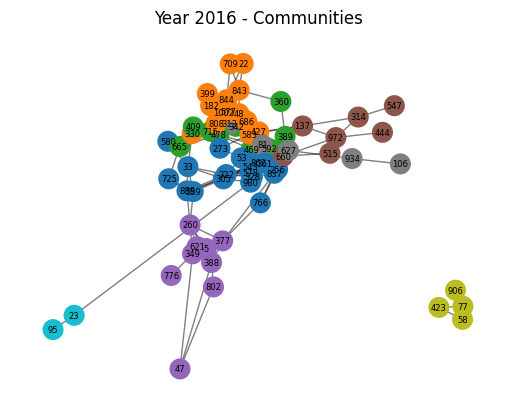

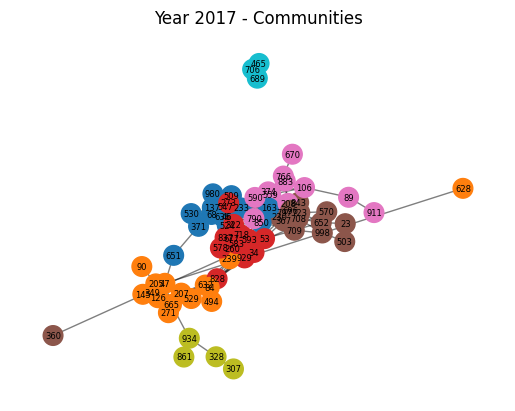

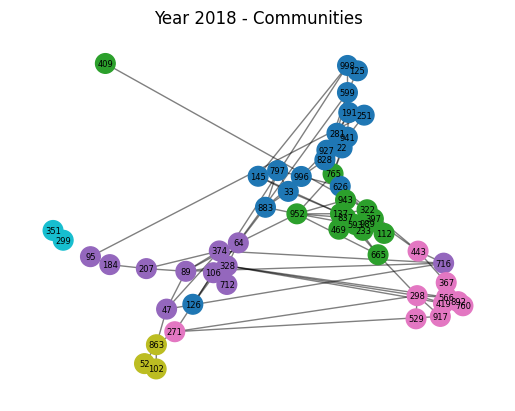

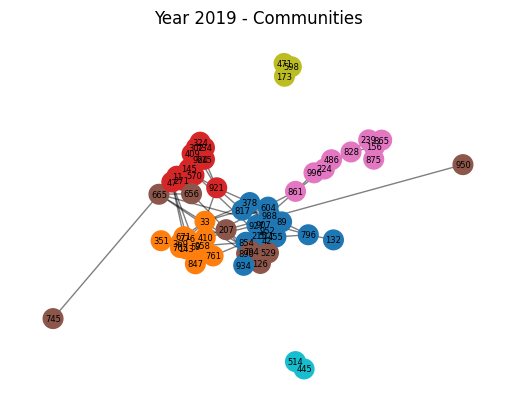

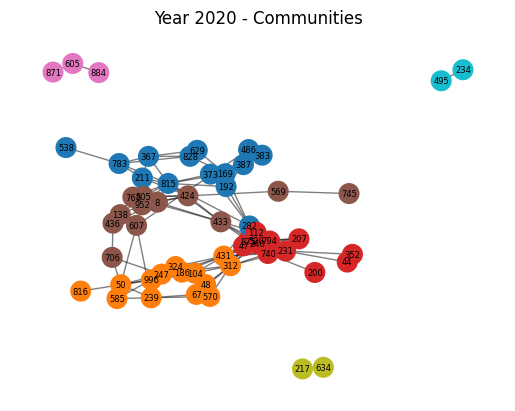

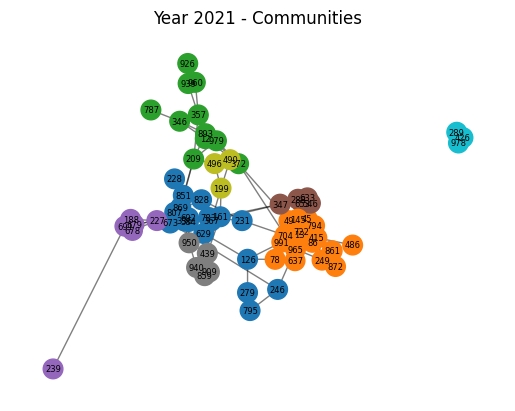

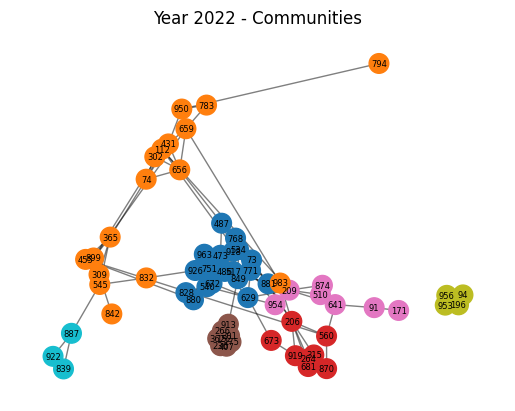

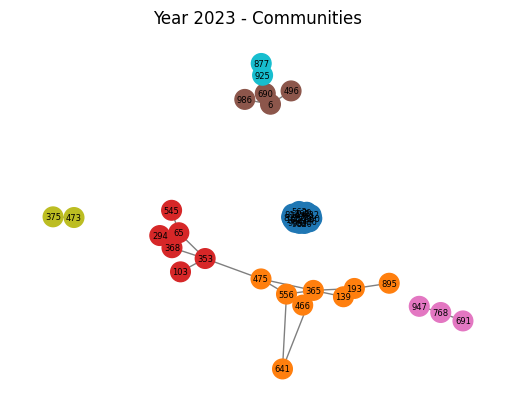

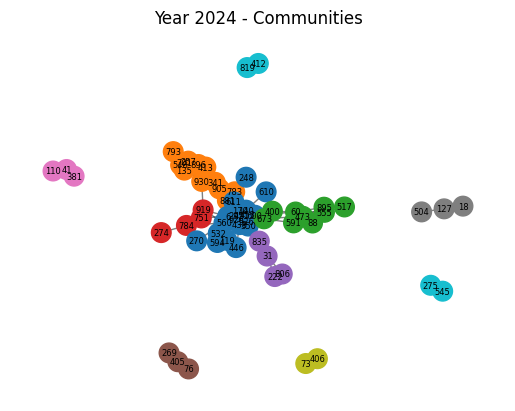

In [22]:
for y in unique_years:
    subG = subgraphs_by_year[y]
    if subG.number_of_nodes() == 0:
        continue
    
    communities = community.greedy_modularity_communities(subG)
    # Convert the community sets into a node->community_index mapping
    node_community_map = {}
    for i, c in enumerate(communities):
        for node in c:
            node_community_map[node] = i
    
    # Draw the subgraph
    plt.figure()
    pos = nx.spring_layout(subG, seed=42)
    
    # To color by community, we can make a list of color values for each node
    community_indices = [node_community_map[n] for n in subG.nodes()]
    nx.draw_networkx_nodes(
        subG,
        pos=pos,
        node_size=200,
        node_color=community_indices,  # color nodes by their community index
        cmap=plt.cm.tab10  # or other matplotlib colormap
    )
    nx.draw_networkx_edges(subG, pos=pos, alpha=0.5)
    nx.draw_networkx_labels(subG, pos=pos, font_size=6)

    plt.title(f"Year {y} - Communities")
    plt.axis("off")
    plt.show()

In [23]:
# Static Detection + Matching by Overlap over Years

In [26]:
def jaccard_similarity(setA, setB):
    """
    Computes Jaccard similarity: |A ∩ B| / |A ∪ B|.
    Returns 0 if both sets are empty.
    """
    if not setA and not setB:  # both empty
        return 0
    return len(setA & setB) / len(setA | setB)

In [27]:
comp = community.girvan_newman(subG)

In [28]:
communities_t = next(comp) 

In [31]:
communities_by_year = {}
for y in unique_years:
    subG = subgraphs_by_year[y]
    if subG.number_of_nodes() == 0:
        communities_by_year[y] = []
    else:
        # This gives you a list (or list-like) of sets of nodes
        communities = community.greedy_modularity_communities(subG)
        communities_by_year[y] = communities

In [32]:
for i in range(len(unique_years) - 1):
    y1 = unique_years[i]
    y2 = unique_years[i + 1]
    
    communities_t     = communities_by_year[y1]     # communities in year y1
    communities_tplus = communities_by_year[y2]     # communities in year y2
    
    match_results = {}
    for idx, comm_t in enumerate(communities_t):
        best_jaccard = 0
        best_index = None

        for j, comm_tplus_ in enumerate(communities_tplus):
            sim = jaccard_similarity(comm_t, comm_tplus_)
            if sim > best_jaccard:
                best_jaccard = sim
                best_index = j
        
        match_results[idx] = (best_index, best_jaccard)

    print(f"--- Matching Communities from Year {y1} to Year {y2} ---")
    for comm_idx, (matched_comm_idx, score) in match_results.items():
        print(
            f"Community {comm_idx} in {y1} best matches "
            f"Community {matched_comm_idx} in {y2} with Jaccard={score:.3f}"
        )
    print()

--- Matching Communities from Year 1996 to Year 1998 ---
Community 0 in 1996 best matches Community None in 1998 with Jaccard=0.000

--- Matching Communities from Year 1998 to Year 1999 ---
Community 0 in 1998 best matches Community None in 1999 with Jaccard=0.000
Community 1 in 1998 best matches Community None in 1999 with Jaccard=0.000
Community 2 in 1998 best matches Community None in 1999 with Jaccard=0.000

--- Matching Communities from Year 1999 to Year 2000 ---
Community 0 in 1999 best matches Community None in 2000 with Jaccard=0.000
Community 1 in 1999 best matches Community None in 2000 with Jaccard=0.000

--- Matching Communities from Year 2000 to Year 2001 ---
Community 0 in 2000 best matches Community None in 2001 with Jaccard=0.000
Community 1 in 2000 best matches Community None in 2001 with Jaccard=0.000

--- Matching Communities from Year 2001 to Year 2002 ---
Community 0 in 2001 best matches Community None in 2002 with Jaccard=0.000
Community 1 in 2001 best matches Com